In [1]:
#Data Analysis
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
American_bankruptcy = pd.read_csv("american_bankruptcy.csv")

In [3]:
American_bankruptcy

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [4]:
column_mapping = {
    'X1': 'Current_Assets',
    'X2': 'Cost_of_Goods_Sold',
    'X3': 'Depreciation_Amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net_Income',
    'X7': 'Total_Receivables',
    'X8': 'Market_Value',
    'X9': 'Net_Sales',
    'X10': 'Total_Assets',
    'X11': 'Total_Long_Term_Debt',
    'X12': 'EBIT',
    'X13': 'Gross_Profit',
    'X14': 'Total_Current_Liabilities',
    'X15': 'Retained_Earnings',
    'X16': 'Total_Revenue',
    'X17': 'Total_Liabilities',
    'X18': 'Total_Operating_Expenses'
}

American_bankruptcy.rename(columns=column_mapping, inplace=True)

In [5]:
American_bankruptcy.dtypes

company_name                  object
status_label                  object
year                           int64
Current_Assets               float64
Cost_of_Goods_Sold           float64
Depreciation_Amortization    float64
EBITDA                       float64
Inventory                    float64
Net_Income                   float64
Total_Receivables            float64
Market_Value                 float64
Net_Sales                    float64
Total_Assets                 float64
Total_Long_Term_Debt         float64
EBIT                         float64
Gross_Profit                 float64
Total_Current_Liabilities    float64
Retained_Earnings            float64
Total_Revenue                float64
Total_Liabilities            float64
Total_Operating_Expenses     float64
dtype: object

In [6]:
American_bankruptcy.head(10)

,company_name,status_label,year,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,...,Net_Sales,Total_Assets,Total_Long_Term_Debt,EBIT,Gross_Profit,Total_Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Total_Operating_Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


In [7]:
American_bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               78682 non-null  object 
 1   status_label               78682 non-null  object 
 2   year                       78682 non-null  int64  
 3   Current_Assets             78682 non-null  float64
 4   Cost_of_Goods_Sold         78682 non-null  float64
 5   Depreciation_Amortization  78682 non-null  float64
 6   EBITDA                     78682 non-null  float64
 7   Inventory                  78682 non-null  float64
 8   Net_Income                 78682 non-null  float64
 9   Total_Receivables          78682 non-null  float64
 10  Market_Value               78682 non-null  float64
 11  Net_Sales                  78682 non-null  float64
 12  Total_Assets               78682 non-null  float64
 13  Total_Long_Term_Debt       78682 non-null  flo

In [8]:
American_bankruptcy.describe()

,year,Current_Assets,Cost_of_Goods_Sold,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Total_Receivables,Market_Value,Net_Sales,Total_Assets,Total_Long_Term_Debt,EBIT,Gross_Profit,Total_Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Total_Operating_Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [9]:
American_bankruptcy.isnull().sum()

company_name                 0
status_label                 0
year                         0
Current_Assets               0
Cost_of_Goods_Sold           0
Depreciation_Amortization    0
EBITDA                       0
Inventory                    0
Net_Income                   0
Total_Receivables            0
Market_Value                 0
Net_Sales                    0
Total_Assets                 0
Total_Long_Term_Debt         0
EBIT                         0
Gross_Profit                 0
Total_Current_Liabilities    0
Retained_Earnings            0
Total_Revenue                0
Total_Liabilities            0
Total_Operating_Expenses     0
dtype: int64

In [10]:
American_bankruptcy["status_label"].unique()

array(['alive', 'failed'], dtype=object)

In [11]:
American_bankruptcy["company_name"].unique()

array(['C_1', 'C_2', 'C_3', ..., 'C_8969', 'C_8970', 'C_8971'],
      dtype=object)

In [12]:
American_bankruptcy.groupby('status_label')['company_name'].nunique()

status_label
alive     8362
failed     609
Name: company_name, dtype: int64

In [13]:
American_bankruptcy.iloc[:,0].nunique()

8971

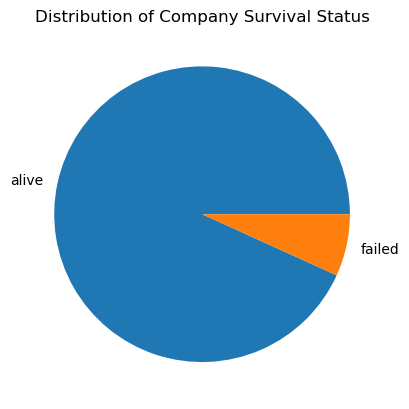

In [14]:
values = (8362,609)
labels = ("alive","failed")
plt.pie(values,labels = labels)
plt.title("Distribution of Company Survival Status")
plt.show()

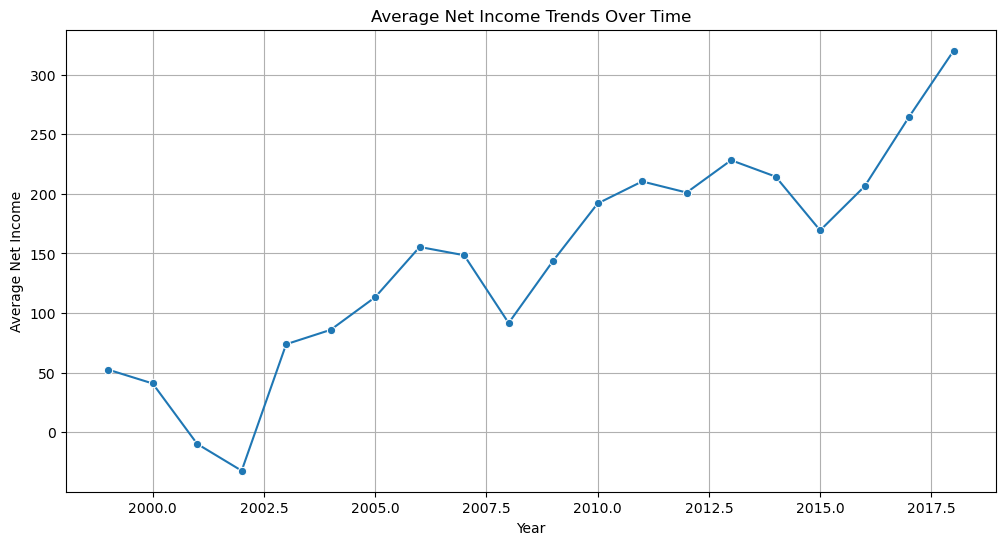

In [15]:

yearly_data = American_bankruptcy.groupby('year')['Net_Income'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='year', y='Net_Income', marker='o')
plt.title("Average Net Income Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Net Income")
plt.grid(True)
plt.show()


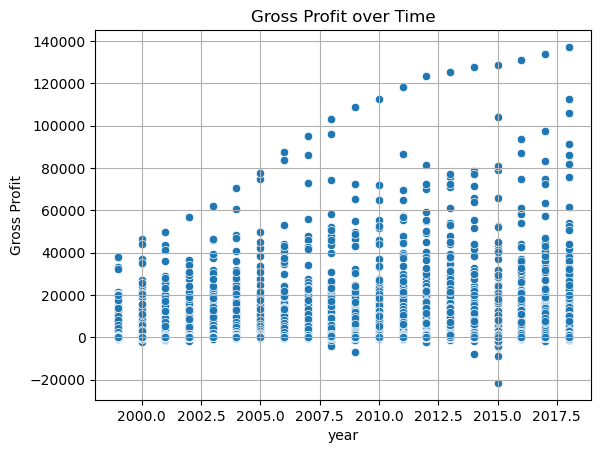

In [16]:
sns.scatterplot(data=American_bankruptcy, x='year', y='Gross_Profit')  

plt.title('Gross Profit over Time')
plt.xlabel('year')  
plt.ylabel('Gross Profit')  
plt.grid(True)
plt.show()

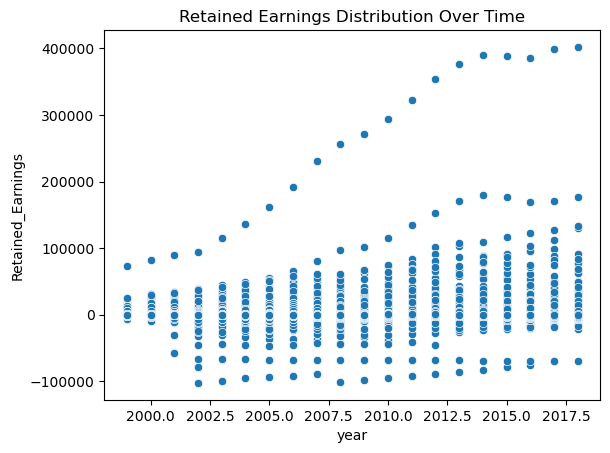

In [17]:
sns.scatterplot(x='year', y='Retained_Earnings', data=American_bankruptcy)
plt.title('Retained Earnings Distribution Over Time')
plt.show()

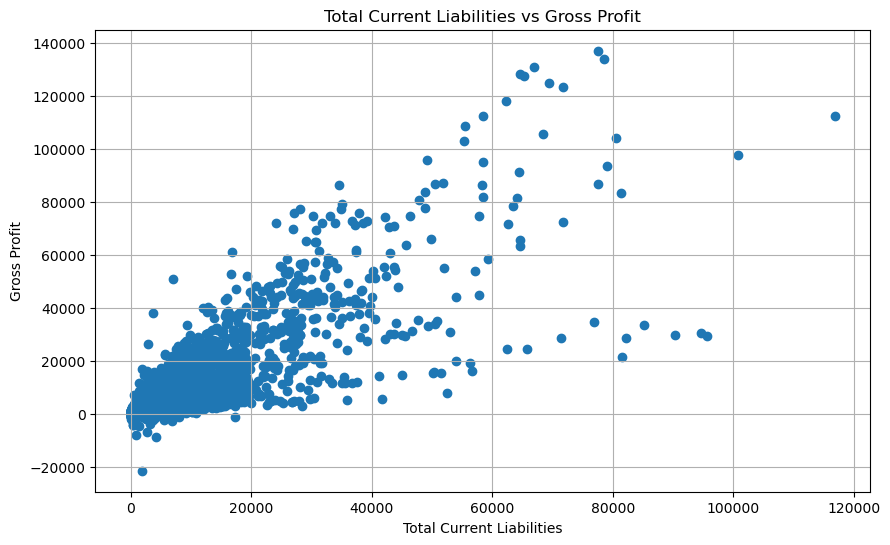

In [18]:
plt.figure(figsize= (10,6))
plt.scatter(x='Total_Current_Liabilities', y='Gross_Profit',data=American_bankruptcy)
plt.title('Total Current Liabilities vs Gross Profit')
plt.xlabel('Total Current Liabilities')  
plt.ylabel('Gross Profit')  
plt.grid(True)
plt.show()

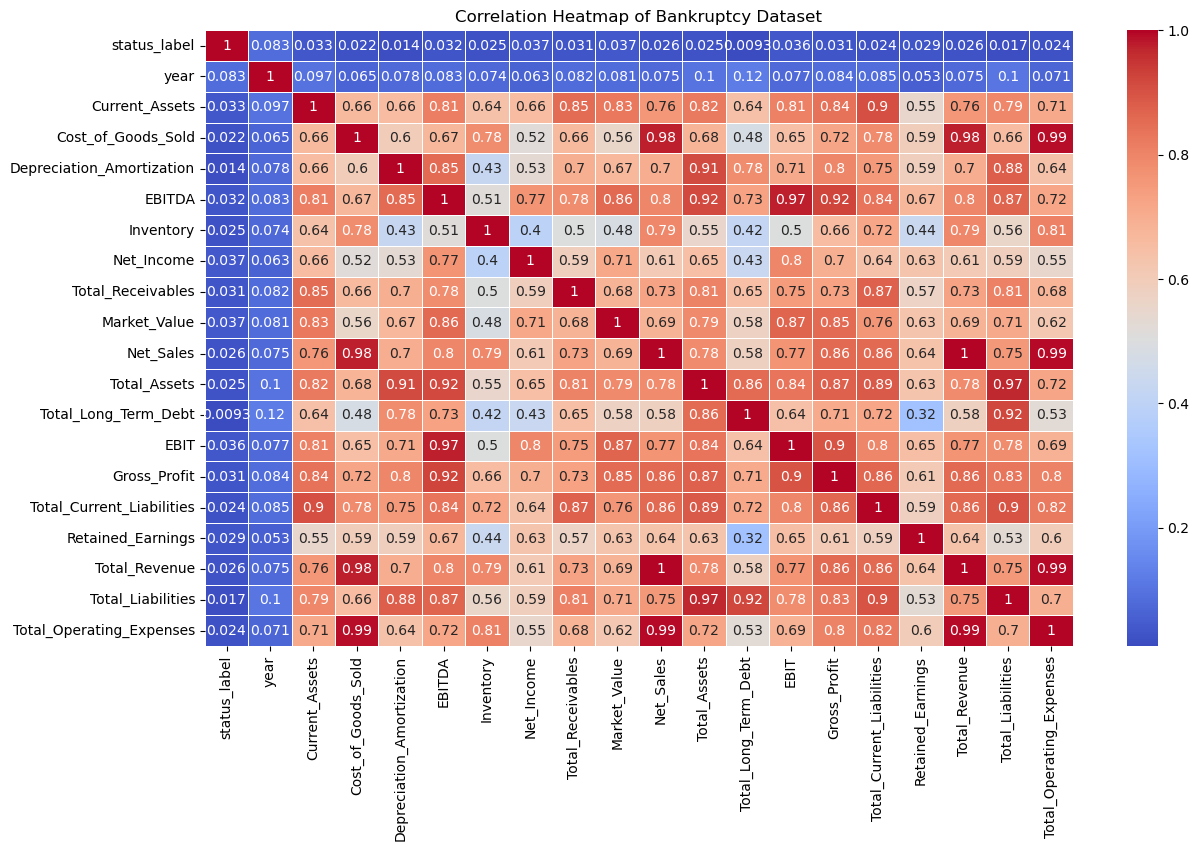

In [19]:
American_bankruptcy['status_label'] = American_bankruptcy['status_label'].map({'alive': 1, 'failed': 0})
df_numeric = American_bankruptcy.drop(['company_name'], axis=1)
corr_matrix = df_numeric.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Bankruptcy Dataset')
plt.show()